In [1]:
from pychomp import *
from pychomp.Braids import *

%load_ext memory_profiler

In [2]:
#braid u
u = BraidDiagram([[1,3,1],
                  [2,1,2],
                  [3,4,3],
                  [4,2,4]])
#2-fold cover of u
u2 = BraidDiagram([[1,3,1,3,1],
                   [2,1,2,1,2],
                   [3,4,3,4,3],
                   [4,2,4,2,4]])
#3-fold cover of u
u3 = BraidDiagram([[1,3,1,3,1,3,1],
                   [2,1,2,1,2,1,2],
                   [3,4,3,4,3,4,3],
                   [4,2,4,2,4,2,4]])
#4-fold cover of u
u4 = BraidDiagram([[1,3,1,3,1,3,1,3,1],
                   [2,1,2,1,2,1,2,1,2],
                   [3,4,3,4,3,4,3,4,3],
                   [4,2,4,2,4,2,4,2,4]])
#5-fold cover of u
u5 = BraidDiagram([[1,3,1,3,1,3,1,3,1,3,1],
                   [2,1,2,1,2,1,2,1,2,1,2],
                   [3,4,3,4,3,4,3,4,3,4,3],
                   [4,2,4,2,4,2,4,2,4,2,4]])

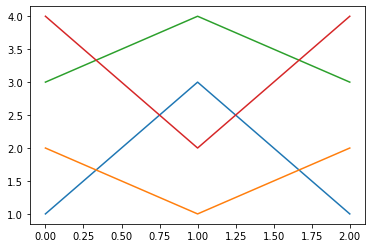

Braid Diagram

In [3]:
u

In [4]:
%memit
braid_complex, braid_graph = BraidComplex(u)

peak memory: 72.38 MiB, increment: -0.30 MiB


In [5]:
%memit
(poset, graded_complex) = FlowGradedComplex(braid_complex, braid_graph)

peak memory: 72.38 MiB, increment: 0.02 MiB


Compute Conley complex and connection matrix

In [6]:
%%time
cm = ConnectionMatrix(graded_complex)

CPU times: user 313 µs, sys: 51 µs, total: 364 µs
Wall time: 369 µs


Timing for initial Morse complex

In [7]:
timingMGC = %timeit -o MorseGradedComplex(graded_complex)

154 µs ± 4.54 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Timing for Conley complex/connection matrix

In [8]:
timingCM = %timeit -o ConnectionMatrix(graded_complex)

209 µs ± 6.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Visualize Conley complex through *Conley-Morse graph* (see [2]):
 - Each node of poset with nontrivial Betti number of fiber is annotated with the Betti numbers

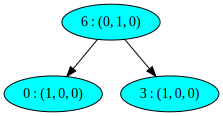

In [9]:
reduced_poset = Poset(InducedSubgraph(TransitiveClosure(poset), lambda v : v in cm.count()))
DrawGradedComplex(cm, reduced_poset)

[1] Harker, S., Mischaikow, K. & Spendlove, K. Morse theoretic templates for high dimensional homology computation.  arXiv  preprint arXiv:2105.09870, 2021. https://arxiv.org/abs/2105.09870.

[2] Harker, S., Mischaikow, K. & Spendlove, K. A computational framework for connection matrix theory. J Appl. and Comput. Topology (2021). https://doi.org/10.1007/s41468-021-00073-3